In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

Test_data = pd.read_csv ("Merged_data.csv")
print (Test_data)

    Unnamed: 0 CropsM    TonnesM  US$1000M  TempChangeM  YearR  CropsRM  \
0            0  Maize  239548580  17247498        0.755      1        1   
1            1  Maize  251853900  18385335        1.000      2        1   
2            2  Maize  241376650  18827379        0.784      3        1   
3            3  Maize  227766880  20726786        0.953      4        1   
4            4  Maize  256229020  24341757        0.992      5        1   
5            5  Maize  299875570  24289921        0.866      6        1   
6            6  Maize  282262550  22298741        1.157      7        1   
7            7  Maize  267502850  32100342        1.028      8        1   
8            8  Maize  331177280  54644251        1.147      9        1   
9            9  Maize  305911450  48945832        0.215     10        1   
10          10  Maize  331921050  46468947        0.399     11        1   
11          11  Maize  315617920  64386056        0.694     12        1   
12          12  Maize  31

## Testing for Linearity and Normality



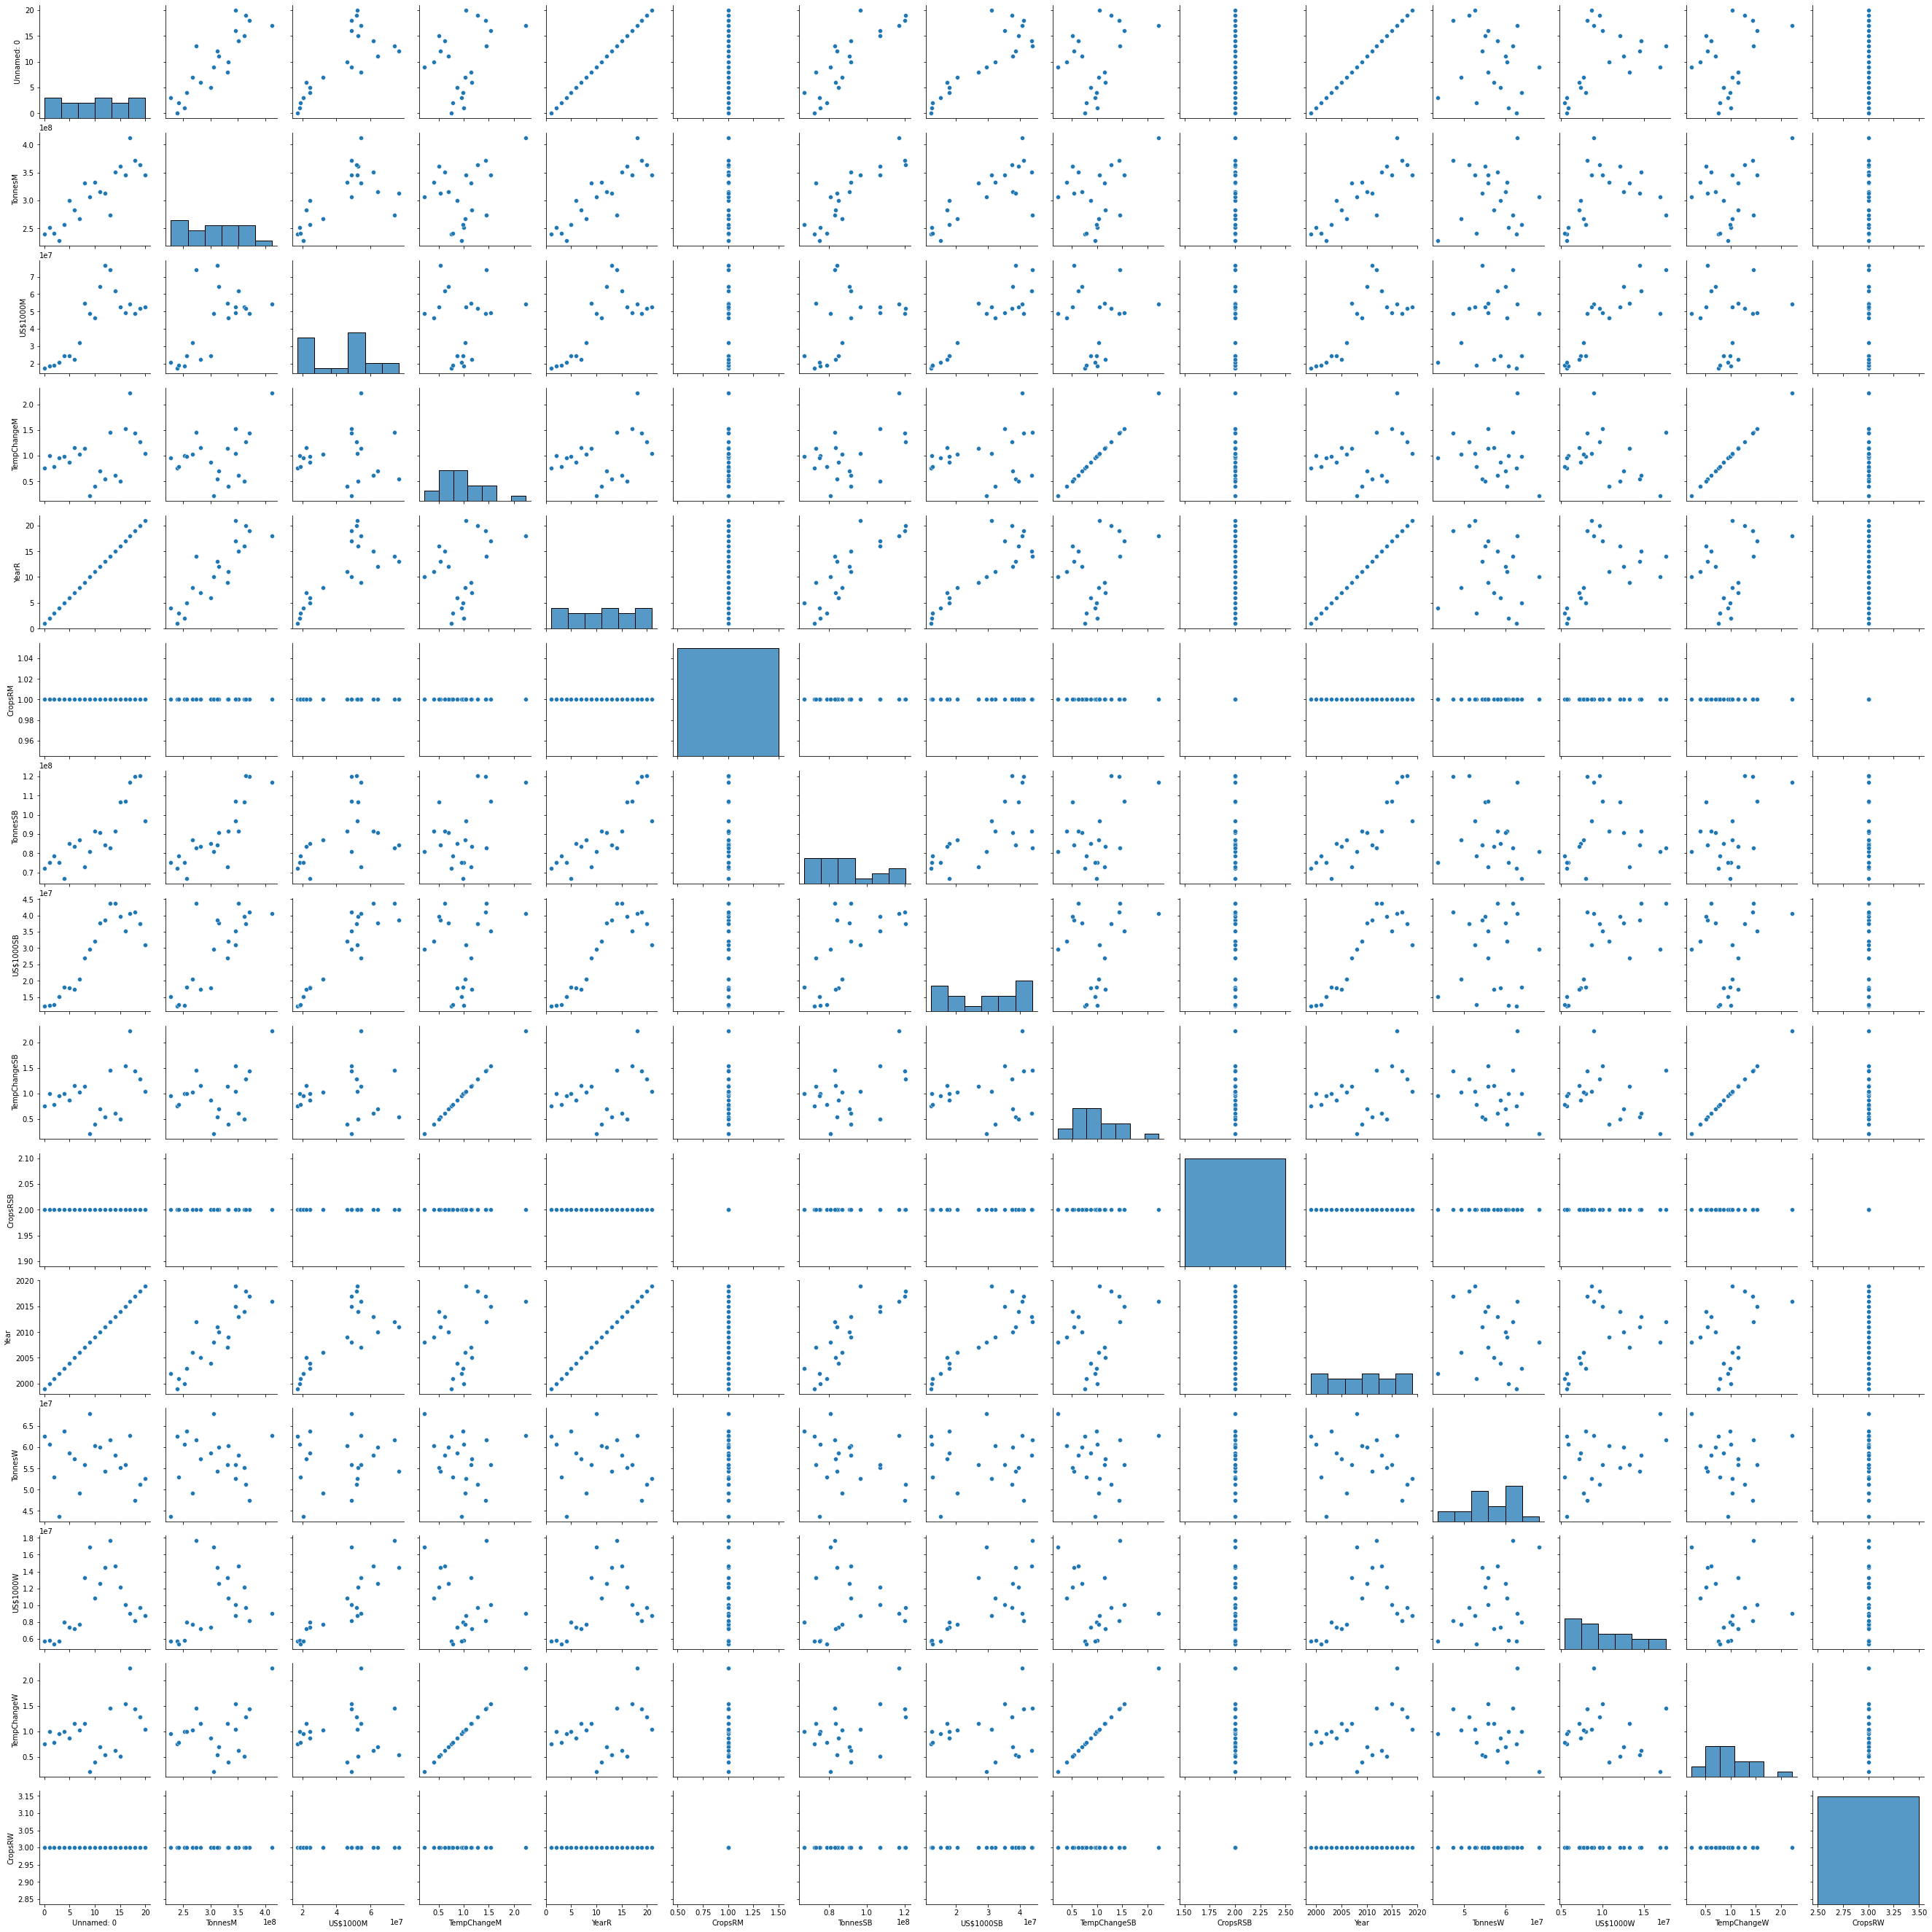

In [32]:
sns.pairplot(Test_data)

## Histogram TonnesM

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TonnesM', ylabel='Density'>

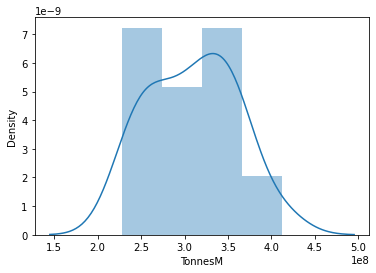

In [31]:
sns.distplot(Test_data['TonnesM'])

## HIstogram of TonnesSB

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TonnesSB', ylabel='Density'>

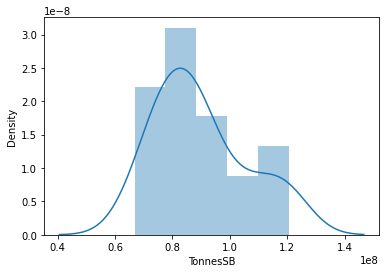

In [33]:
sns.distplot(Test_data['TonnesSB'])

## Histogram of TonnesW

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TonnesW', ylabel='Density'>

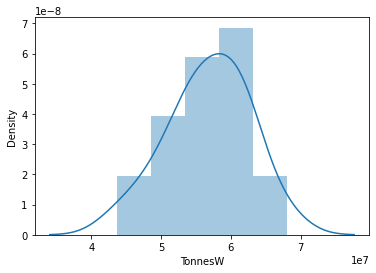

In [34]:
sns.distplot(Test_data['TonnesW'])

## Histogram US$1000M

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='US$1000M', ylabel='Density'>

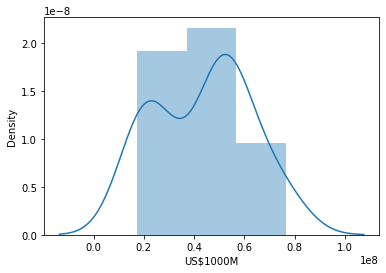

In [35]:
sns.distplot(Test_data['US$1000M'])

## Histogream of US$1000SB

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='US$1000SB', ylabel='Density'>

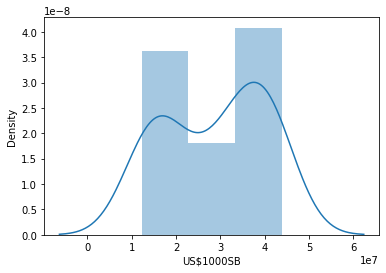

In [36]:
sns.distplot(Test_data['US$1000SB'])

## Histogream of US$1000W

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='US$1000W', ylabel='Density'>

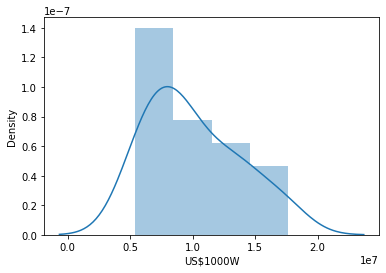

In [37]:
sns.distplot(Test_data['US$1000W'])

### Skewed to the right positively skewed

## Histogram TempChangeM

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempChangeM', ylabel='Density'>

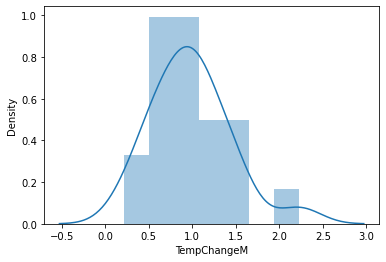

In [38]:
sns.distplot(Test_data['TempChangeM'])

### Normaly skewed

## Histogram of TempChangeSB

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempChangeSB', ylabel='Density'>

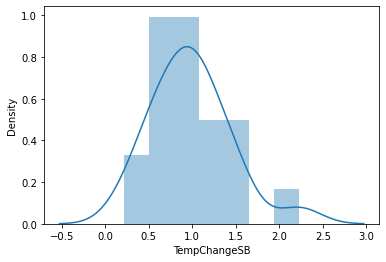

In [39]:
sns.distplot(Test_data['TempChangeSB'])

### Normaly Skewed

## Histogram of TempChangeW

/Users/lskyrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempChangeW', ylabel='Density'>

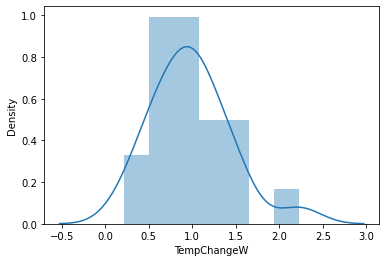

In [40]:
sns.distplot(Test_data['TempChangeW'])

#### We need to look into manipulations on TonnesSB, TonnesW, US$1000M, US$1000SB, US$1000W

## Test for Homoscedasticity

### US$1000 Maize

In [41]:
x = Test_data['TempChangeM']
y = Test_data['US$1000M']
model = sm.OLS(y,x).fit()

In [42]:
pred_val = model.fittedvalues.copy()
true_val = Test_data['US$1000M'].values.copy()
residual = true_val - pred_val

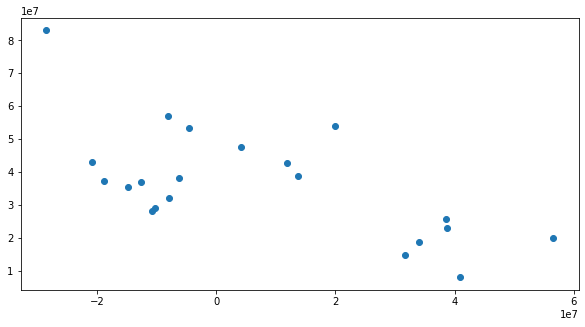

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [44]:
sms.diagnostic.het_breuschpagan(residual, Test_data[['TempChangeM']])

(3.62465796118442, nan, 4.172186024409912, 0.0544980584338767)

##### Passed

In [45]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=2.8047647671824456, pvalue=0.012182604419075071)

#### Failed violated the assumption

#### Testing for outliers

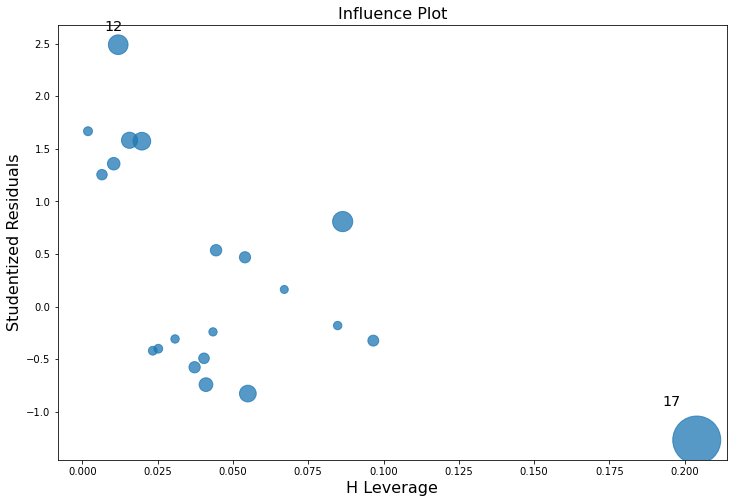

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

#### The scatter plot does not look good and the equations are >.05 so we fail the assumption of Homoscedasticity there are big outliers influencing the data. Based on the graph abbove there must be a significant outlier after the H leverage of 0.2. We will test this with a table.


<AxesSubplot:>

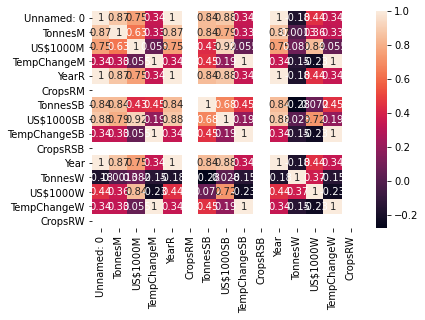

In [54]:
sns.heatmap(Test_data.corr(), annot=True)

In [56]:
Test_data.corr()

,Unnamed: 0,TonnesM,US$1000M,TempChangeM,YearR,CropsRM,TonnesSB,US$1000SB,TempChangeSB,CropsRSB,Year,TonnesW,US$1000W,TempChangeW,CropsRW
Unnamed: 0,1.000000,0.873690,0.751696,0.343478,1.000000,NaN,0.843573,0.876243,0.343478,NaN,1.000000,-0.177308,0.443025,0.343478,NaN
TonnesM,0.873690,1.000000,0.633998,0.329867,0.873690,NaN,0.839477,0.792811,0.329867,NaN,0.873690,-0.001255,0.358569,0.329867,NaN
US$1000M,0.751696,0.633998,1.000000,0.055260,0.751696,NaN,0.426653,0.922645,0.055260,NaN,0.751696,0.082317,0.844458,0.055260,NaN
TempChangeM,0.343478,0.329867,0.055260,1.000000,0.343478,NaN,0.449014,0.185411,1.000000,NaN,0.343478,-0.145539,-0.228002,1.000000,NaN
YearR,1.000000,0.873690,0.751696,0.343478,1.000000,NaN,0.843573,0.876243,0.343478,NaN,1.000000,-0.177308,0.443025,0.343478,NaN
CropsRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TonnesSB,0.843573,0.839477,0.426653,0.449014,0.843573,NaN,1.000000,0.678921,0.449014,NaN,0.843573,-0.280131,0.072390,0.449014,NaN
US$1000SB,0.876243,0.792811,0.922645,0.185411,0.876243,NaN,0.678921,1.000000,0.185411,NaN,0.876243,0.028155,0.721259,0.185411,NaN
TempChangeSB,0.343478,0.329867,0.055260,1.000000,0.343478,NaN,0.449014,0.185411,1.000000,NaN,0.343478,-0.145539,-0.228002,1.000000,NaN
CropsRSB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_TempChangeM   cooks_d  standard_resid  hat_diag  dffits_internal  \
0         -0.065043  0.004412       -0.429106  0.023402        -0.066425   
1         -0.153652  0.024150       -0.751076  0.041054        -0.155404   
2         -0.064534  0.004347       -0.409782  0.025234        -0.065932   
3         -0.113579  0.013345       -0.587008  0.037285        -0.115522   
4         -0.101015  0.010606       -0.501912  0.040399        -0.102984   
5         -0.054963  0.003164       -0.315604  0.030788        -0.056251   
6         -0.199570  0.040466       -0.834182  0.054957        -0.201161   
7         -0.051327  0.002765       -0.246899  0.043385        -0.052580   
8          0.111881  0.013026        0.477647  0.054011         0.114131   
9          0.072686  0.004852        1.597426  0.001898         0.069654   
10         0.101690  0.010053        1.236182  0.006536         0.100266   
11         0.223285  0.046439        1.517293  0.019773         0.215497   
12         0

##### The DFBETAS value is shown in the dfb_TempChangeM column, and if any value is greater than 1, then there is a problem with an influential value.

#### The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates a problem.

#### Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, there may have a moderate outlier problem, and if it is over .5, then you have a large outlier problem.

#### Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, there is probably have an outlier problem.



## Tonnes Maize

In [48]:
x = Test_data['TempChangeM']
y = Test_data['TonnesM']
model = sm.OLS(y,x).fit()

In [49]:
pred_val = model.fittedvalues.copy()
true_val = Test_data['TonnesM'].values.copy()
residual = true_val - pred_val

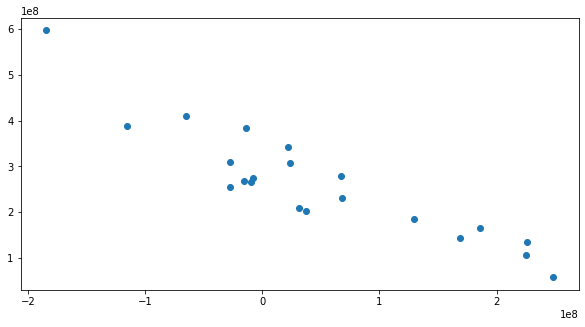

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [57]:
sms.diagnostic.het_breuschpagan(residual, Test_data[['TempChangeM']])

(3.4004803368943755, nan, 3.8642876646490523, 0.06336210182142277)

#### Passed

In [58]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.3111040850425504, pvalue=0.207257157702494)

#### Passed

#### Testing for outliers


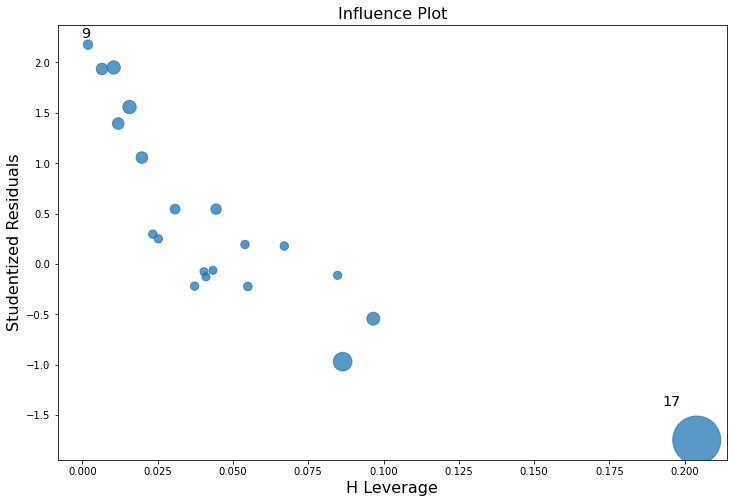

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

#### Once again, we fail the assumption of Homoscedasticity there are big outliers influencing the data. Based on the graph abbove there must be a significant outlier after the H leverage of 0.2. We will test this with a table.

In [61]:
infl2 = model.get_influence()
print(infl2.summary_frame())

    dfb_TempChangeM   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          0.045953  0.002213        0.303866  0.023402         0.047038   
1         -0.026405  0.000733       -0.130876  0.041054        -0.027079   
2          0.040182  0.001694        0.255809  0.025234         0.041158   
3         -0.043180  0.001958       -0.224829  0.037285        -0.044246   
4         -0.015472  0.000252       -0.077354  0.040399        -0.015872   
5          0.097140  0.009780        0.554860  0.030788         0.098894   
6         -0.053669  0.003024       -0.228040  0.054957        -0.054991   
7         -0.013297  0.000186       -0.064054  0.043385        -0.013641   
8          0.046259  0.002248        0.198432  0.054011         0.047414   
9          0.094910  0.007589        1.997922  0.001898         0.087118   
10         0.156994  0.021671        1.814967  0.006536         0.147212   
11         0.150057  0.022387        1.053475  0.019773         0.149622   
12         0

#### Table doesn't indicate amy outlier issue.

## US$1000 Soybeans

In [62]:
x = Test_data['TempChangeSB']
y = Test_data['US$1000SB']
model = sm.OLS(y,x).fit()

In [63]:
pred_val = model.fittedvalues.copy()
true_val = Test_data['US$1000SB'].values.copy()
residual = true_val - pred_val

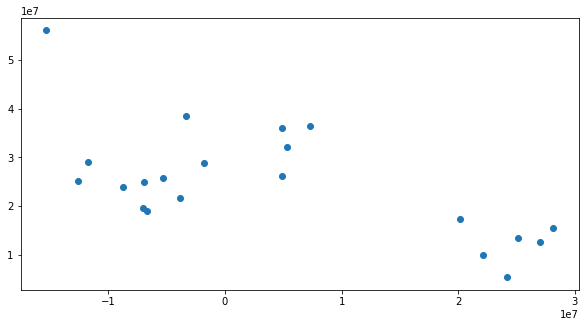

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [65]:
sms.diagnostic.het_breuschpagan(residual, Test_data[['TempChangeSB']])

(3.365127069233754, nan, 3.816446063938311, 0.06488316686599108)

#### Passed

In [66]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=3.267007832658333, pvalue=0.004542207349681529)

#### Failed

## Testing for outliers

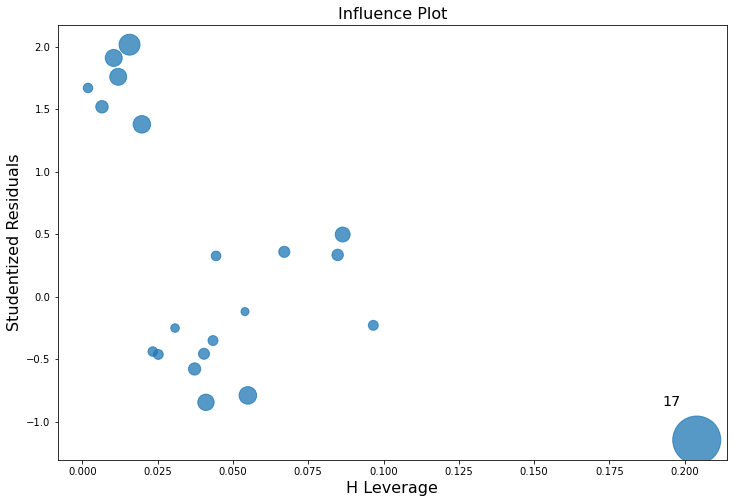

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [69]:
infl3 = model.get_influence()
print(infl3.summary_frame())

    dfb_TempChangeSB   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          -0.068056  0.004826       -0.448786  0.023402        -0.069471   
1          -0.174952  0.031051       -0.851643  0.041054        -0.176213   
2          -0.074444  0.005769       -0.472055  0.025234        -0.075951   
3          -0.113934  0.013427       -0.588810  0.037285        -0.115876   
4          -0.093835  0.009167       -0.466641  0.040399        -0.095747   
5          -0.044848  0.002110       -0.257738  0.030788        -0.045937   
6          -0.190501  0.036986       -0.797507  0.054957        -0.192317   
7          -0.074858  0.005861       -0.359473  0.043385        -0.076554   
8          -0.028670  0.000865       -0.123055  0.054011        -0.029403   
9           0.072746  0.004859        1.598576  0.001898         0.069704   
10          0.123116  0.014230        1.470706  0.006536         0.119289   
11          0.195660  0.036638        1.347700  0.019773         0.191410   

## US$1000 Wheat

In [70]:
x = Test_data['TempChangeW']
y = Test_data['US$1000W']
model = sm.OLS(y,x).fit()

In [71]:
pred_val = model.fittedvalues.copy()
true_val = Test_data['US$1000W'].values.copy()
residual = true_val - pred_val

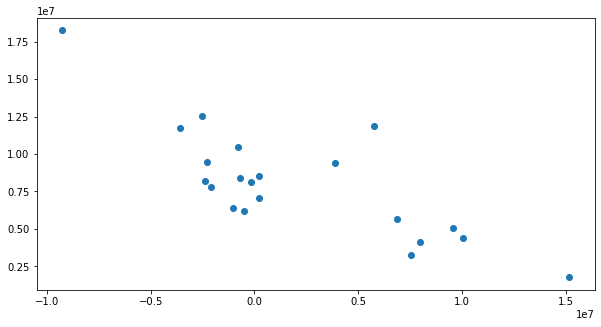

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [73]:
sms.diagnostic.het_breuschpagan(residual, Test_data[['TempChangeW']])

(2.907001613589173, nan, 3.21339951676837, 0.08817793867888137)

#### Passed

In [75]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.6175770240699467, pvalue=0.12415684296800421)

#### Passed

## Testing for outliers

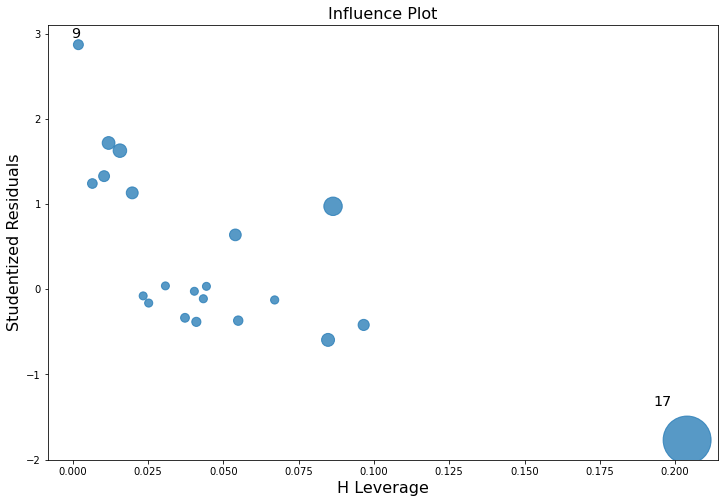

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [77]:
infl4 = model.get_influence()
print(infl4.summary_frame())

    dfb_TempChangeW   cooks_d  standard_resid  hat_diag  dffits_internal  \
0         -0.012139  0.000155       -0.080445  0.023402        -0.012453   
1         -0.079364  0.006579       -0.392019  0.041054        -0.081112   
2         -0.026158  0.000719       -0.166686  0.025234        -0.026819   
3         -0.066097  0.004572       -0.343567  0.037285        -0.067613   
4         -0.004971  0.000026       -0.024855  0.040399        -0.005100   
5          0.006961  0.000051        0.040068  0.030788         0.007141   
6         -0.089018  0.008282       -0.377381  0.054957        -0.091005   
7         -0.023855  0.000599       -0.114887  0.043385        -0.024467   
8          0.152489  0.023963        0.647851  0.054011         0.154800   
9          0.125227  0.011510        2.460476  0.001898         0.107287   
10         0.100689  0.009871        1.224934  0.006536         0.099354   
11         0.160718  0.025473        1.123746  0.019773         0.159603   
12         0

#### Student_resid has a value over 2.5 whiich signifies that we have a outlier problem.